<a href="https://colab.research.google.com/github/56sarager/Simulation-Colabs/blob/main/ComputationalEssay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction

#Results & Analysis

##Part A

<ipython-input-50-b2f42d1ed7e3>:14: RuntimeWarning: invalid value encountered in sqrt
  a2= -(np.absolute(t)+E**2-E*np.sqrt(np.absolute(t)+E**2))*np.sqrt(b2)*t/(np.absolute(t)*np.sqrt(np.absolute(t)+E**2))


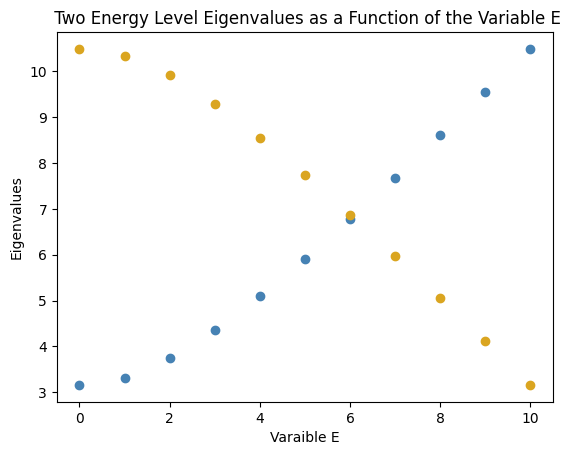

[0.15811388 0.21583124 0.28708287 0.36794495 0.45495098 0.54580399
 0.6391165  0.73405729 0.83011626 0.9269696  1.02440442] [2.50000000e-03 1.34168760e-03 7.58342613e-04 4.61651585e-04
 3.01960973e-04 2.09800542e-04 1.53010051e-04 1.15989882e-04
 9.06989318e-05 7.27359362e-05 5.95575915e-05]


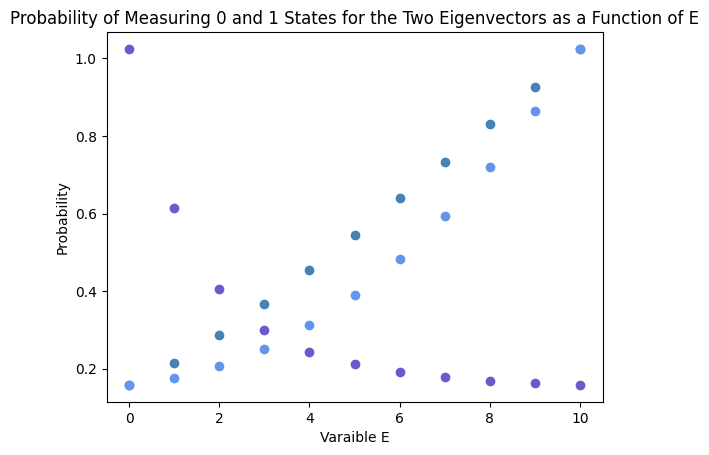

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
E = [0,1,2,3,4,5,6,7,8,9,10]
E = np.array(E)
t = 10+0j
#H = [[E, t], [np.conj(t), -E]]
E1 = np.sqrt(np.absolute(t)+E**2)
E2 = -E1
#Minimum value of E2-E1 = -E1-E1 = -2E1 = -2*np.sqrt(np.absolute(t)+E**2)
min = -2*np.sqrt(np.absolute(t)+E**2)
b1 = 1/(2*np.absolute(t)*(((np.absolute(t)+E**2+np.sqrt(np.absolute(t)+E**2)*E)/(np.absolute(t)*np.sqrt(np.absolute(t)+E**2)))))
b2 = 1/(2*np.absolute(t)*(((np.absolute(t)+E**2-np.sqrt(np.absolute(t)+E**2)*E)/(np.absolute(t)*-np.sqrt(np.absolute(t)+E**2)))))
a1= (np.absolute(t)+E**2+E*np.sqrt(np.absolute(t)+E**2))*np.sqrt(b1)*t/(np.absolute(t)*np.sqrt(np.absolute(t)+E**2))
a2= -(np.absolute(t)+E**2-E*np.sqrt(np.absolute(t)+E**2))*np.sqrt(b2)*t/(np.absolute(t)*np.sqrt(np.absolute(t)+E**2))
phi1 = [a1, b1]
phi2 = [a2, b2]
fig=plt.figure()
ax=fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2", frame_on=False)
plt.title(" Two Energy Level Eigenvalues as a Function of the Variable E")
ax.set_xlabel("Varaible E")
ax.set_ylabel("Eigenvalues")
ax.scatter(E, E1, color="steelblue")
ax2.scatter(E, E2, color="goldenrod")
ax2.set_xticks([])
ax2.set_yticks([])
plt.show()
P1 = np.absolute(a1)**2/10
P1 = np.array(P1)
P2 = np.absolute(a2)**2/10
P2 = np.array(P2)
P3 = np.absolute(b1)**2/10
P3 = np.array(P3)
P4 = np.absolute(b2)**2/10
P4 = np.array(P4)
print(P1,P3)
fig2=plt.figure()
ax=fig2.add_subplot(111, label="1")
ax2=fig2.add_subplot(111, label="2", frame_on=False)
ax3=fig2.add_subplot(111, label="3", frame_on=False)
ax4=fig2.add_subplot(111, label="4", frame_on=False)
plt.title("Probability of Measuring 0 and 1 States for the Two Eigenvectors as a Function of E")
ax.set_xlabel("Varaible E")
ax.set_ylabel("Probability")
ax.scatter(E, P1, color="steelblue")
#ax2.scatter(E, P2, color="midnightblue")
ax3.scatter(E, P3, color="slateblue")
ax4.scatter(E, P4, color="cornflowerblue")
ax2.set_xticks([])
ax2.set_yticks([])
ax3.set_xticks([])
ax3.set_yticks([])
ax4.set_xticks([])
ax4.set_yticks([])
plt.show()

##Part B

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#constants
hbar=1.055e-34 #Js
q=1.602e-19    #C
m=9.1e-31      #kg

#grid
Np=100
a=1e-10    #m
X=a*np.linspace(1, Np, Np)/1e-9  #nm

#Define Hamiltonian as a tridiagonal matrix
t0=(hbar*hbar)/(2*m*a*a)/q #divide by q to convert to eV
on=2.0*t0*np.ones(Np)
off=-t0*np.ones(Np-1)

#Define 'particle in a box' potential
n1=50
x1=n1*a/1e-9
alpha=0.0105
V=alpha*(X-x1)**2; #eV
U=np.array(V*np.ones(Np))

#Define Hamiltonian
H=np.diag(on+U)+np.diag(off,1)+np.diag(off,-1)

#solve for eigenvalues and vectors
W,V=np.linalg.eig(H)
idx = W.argsort()[::1]
W = W[idx]
V = V[:,idx]


#print eigenvalues and energy gaps
#print(W[0:10])
Energy_gap=W[1]-W[0]
print(Energy_gap)
print(W[0])
print(W[1])
#calculate probablity
Psi0=np.multiply(V[:,0],V[:,0])
Psi1=np.multiply(V[:,1],V[:,1])

#plt.figure(1)
#plt.plot(X, U)
#plt.xlabel('Distance (nm)')
#plt.ylabel('Potential Energy (eV)')
#plt.show()

plt.figure(2)
plt.plot(X, Psi0)
plt.xlabel('Distance (nm)')
plt.ylabel('Probability')
plt.title('|Psi_0|^2')
plt.show()

plt.figure(3)
plt.plot(X, Psi1)
plt.xlabel('Distance (nm)')
plt.ylabel('Probability')
plt.title('|Psi_1|^2')
plt.show()

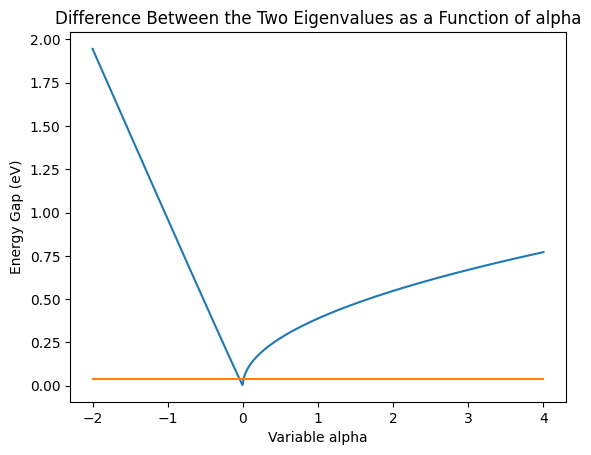

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#constants
hbar=1.055e-34 #Js
q=1.602e-19    #C
m=9.1e-31      #kg

#grid
Np=100
a=1e-10    #m
X=a*np.linspace(1, Np, Np)/1e-9  #nm

#Define Hamiltonian as a tridiagonal matrix
t0=(hbar*hbar)/(2*m*a*a)/q #divide by q to convert to eV
on=2.0*t0*np.ones(Np)
off=-t0*np.ones(Np-1)

#Define 'particle in a box' potential
n1=50
x1=n1*a/1e-9
alpha=np.linspace(-2,4,1000)
#alphe=0.0105 implies Energy Gap = 0.04 eV
Eg=[]
for i in alpha:
  V=i*(X-x1)**2; #eV
  U=np.array(V*np.ones(Np))

#Define Hamiltonian
  H=np.diag(on+U)+np.diag(off,1)+np.diag(off,-1)

#solve for eigenvalues and vectors
  W,V=np.linalg.eig(H)
  idx = W.argsort()[::1]
  W = W[idx]
  V = V[:,idx]
#print eigenvalues and energy gaps
  Energy_gap=W[1]-W[0]
  Eg.append(Energy_gap)
k=np.array(0.04*np.ones(1000))
plt.figure(4)
plt.plot(alpha, Eg)
plt.plot(alpha, k)
plt.title('Difference Between the Two Eigenvalues as a Function of alpha')
plt.xlabel('Variable alpha')
plt.ylabel('Energy Gap (eV)')
plt.show()

##Part C

0.0035276632996265565
0.019048816187876214
0.02257647948750277


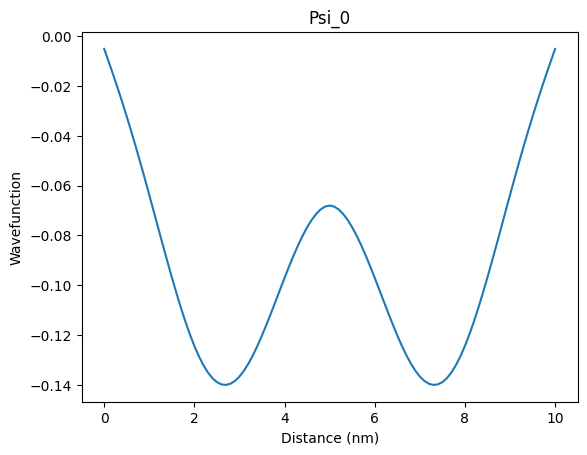

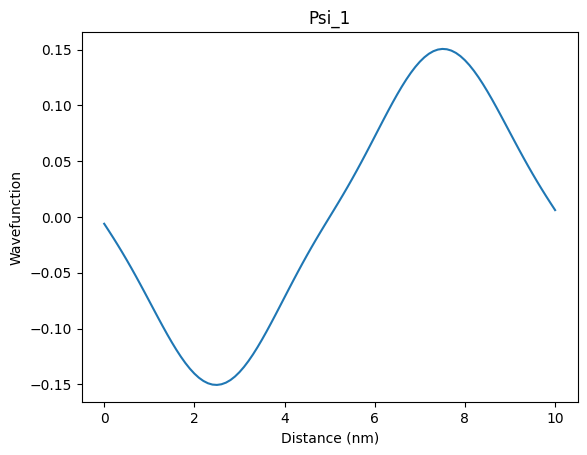

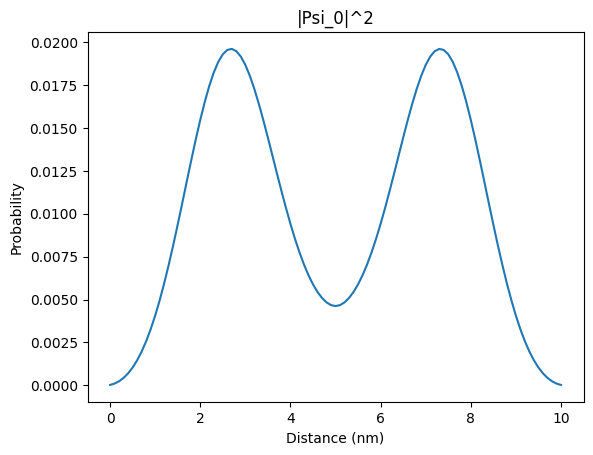

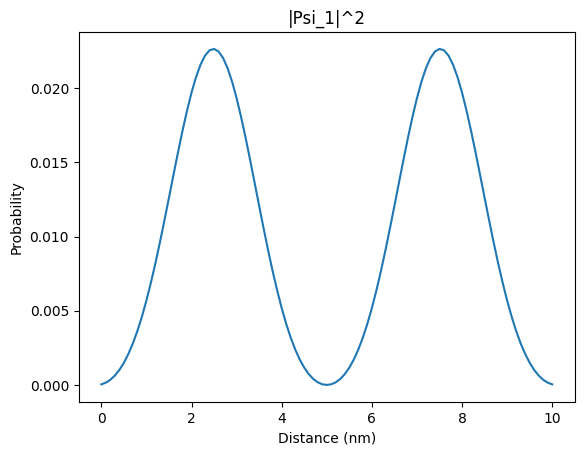

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#constants
hbar=1.055e-34 #Js
q=1.602e-19    #C
m=9.1e-31      #kg

#grid
Np=100
a=1e-10    #m
X=a*np.linspace(0, Np, Np+1)/1e-9  #nm

#Define Hamiltonian as a tridiagonal matrix
t0=(hbar*hbar)/(2*m*a*a)/q #divide by q to convert to eV
on=2.0*t0*np.ones(Np+1)
off=-t0*np.ones(Np)

#Define 'particle in a box' potential
n1=25
n2=75
x1=n1*a/1e-9
x2=n2*a/1e-9
alpha=0.0105
V=[]
for i in X:
  v=min(alpha*(i-x1)**2, alpha*(i-x2)**2); #eV
  V.append(v)
U=np.array(V*np.ones(Np+1))

#Define Hamiltonian
H=np.diag(on+U)+np.diag(off,1)+np.diag(off,-1)

#solve for eigenvalues and vectors
W,V=np.linalg.eig(H)
idx = W.argsort()[::1]
W = W[idx]
V = V[:,idx]


#print eigenvalues and energy gaps
#print(W[0:10])
Energy_gap=W[1]-W[0]
print(Energy_gap)
print(W[0])
print(W[1])
#calculate probablity
Psi0=np.multiply(V[:,0],V[:,0])
Psi1=np.multiply(V[:,1],V[:,1])


plt.figure(1)
plt.plot(X, V[:,0])
plt.xlabel('Distance (nm)')
plt.ylabel('Wavefunction')
plt.title('Psi_0')
plt.show()

plt.figure(2)
plt.plot(X, V[:,1])
plt.xlabel('Distance (nm)')
plt.ylabel('Wavefunction')
plt.title('Psi_1')
plt.show()

plt.figure(3)
plt.plot(X, Psi0)
plt.xlabel('Distance (nm)')
plt.ylabel('Probability')
plt.title('|Psi_0|^2')
plt.show()

plt.figure(4)
plt.plot(X, Psi1)
plt.xlabel('Distance (nm)')
plt.ylabel('Probability')
plt.title('|Psi_1|^2')
plt.show()

##Part D

#Conclusion